In [3]:
!curl -o ./data/high_diamond_ranked_10min.csv https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1412k  100 1412k    0     0  2268k      0 --:--:-- --:--:-- --:--:-- 2289k


In [1]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/high_diamond_ranked_10min.csv')
y = df.blueWins


In [6]:
drop_cols = ['gameId', 'blueWins']
x = df.drop(drop_cols, axis=1)
y = df.blueWins

drop_cols = ['redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff',
             'redExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)

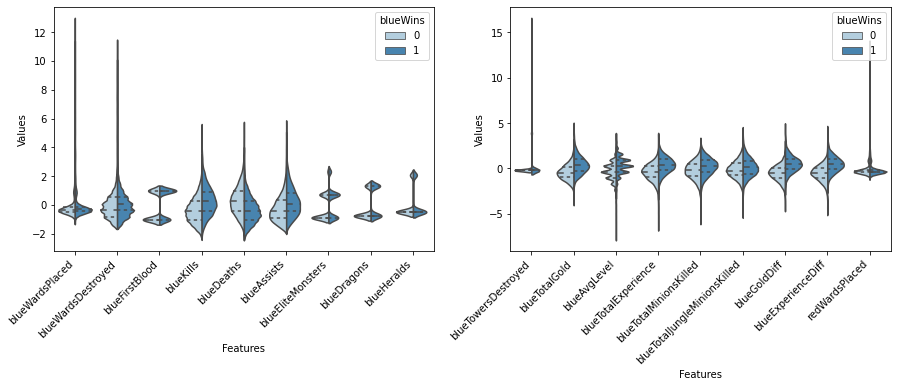

In [7]:
data = x
data_std = (data - data.mean()) / data.std()
# 将特征切分成两部分方便显示
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins',
               var_name='Features', value_name='Values')

# 分成两张子图
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# 绘制小提琴图（0～9特征）
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)


# 继续plot第二部分
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins',
               var_name='Features', value_name='Values')

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins',
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()


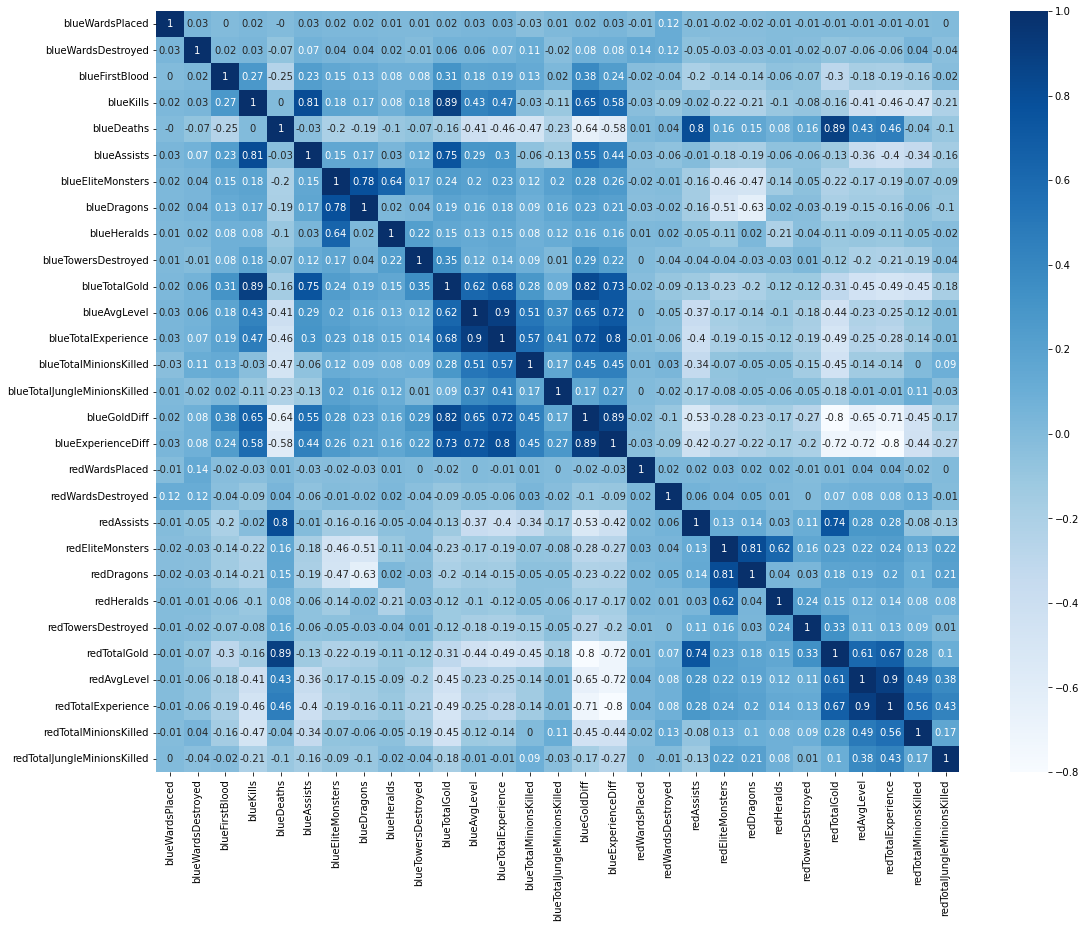

In [8]:
# 通过热力图展示特征相关性
plt.figure(figsize=(18, 14))
sns.heatmap(round(x.corr(), 2), cmap='Blues', annot=True)
plt.show()

# 去除冗余（相关性高）的特征
drop_cols = ['redAvgLevel', 'blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)


/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


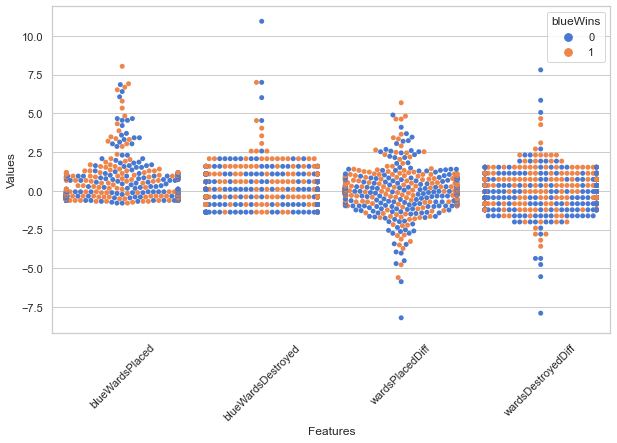

In [10]:
sns.set(style='whitegrid', palette='muted')

# 构造两个新特征：插眼差，拔眼差
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']

# 取1000个样本，展示在散点图上
data = x[['blueWardsPlaced', 'blueWardsDestroyed',
          'wardsPlacedDiff', 'wardsDestroyedDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins',
               var_name="Features", value_name='Values')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()


In [11]:
drop_cols = ['blueWardsPlaced', 'blueWardsDestroyed', 'wardsPlacedDiff',
             'wardsDestroyedDiff', 'redWardsPlaced', 'redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)


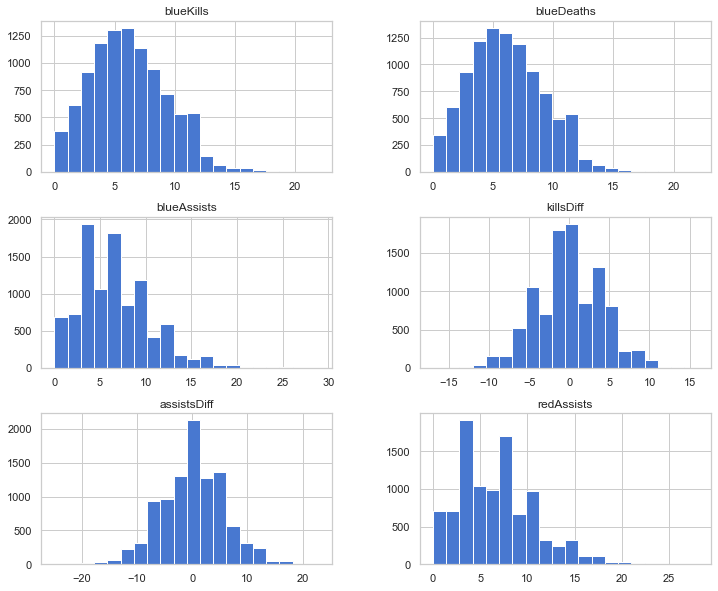

In [12]:
# 净击杀
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
# 助攻差
x['assistsDiff'] = x['blueAssists'] - x['redAssists']

# 直方图
x[['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff',
    'assistsDiff', 'redAssists']].hist(figsize=(12, 10), bins=20)
plt.show()

/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


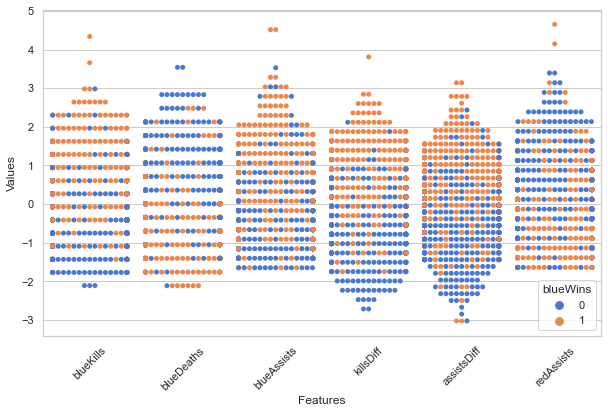

In [13]:
# 散点图验证一下
data = x[['blueKills', 'blueDeaths', 'blueAssists',
          'killsDiff', 'assistsDiff', 'redAssists']].sample(1000)

data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins',
               var_name='Features', value_name='Values')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

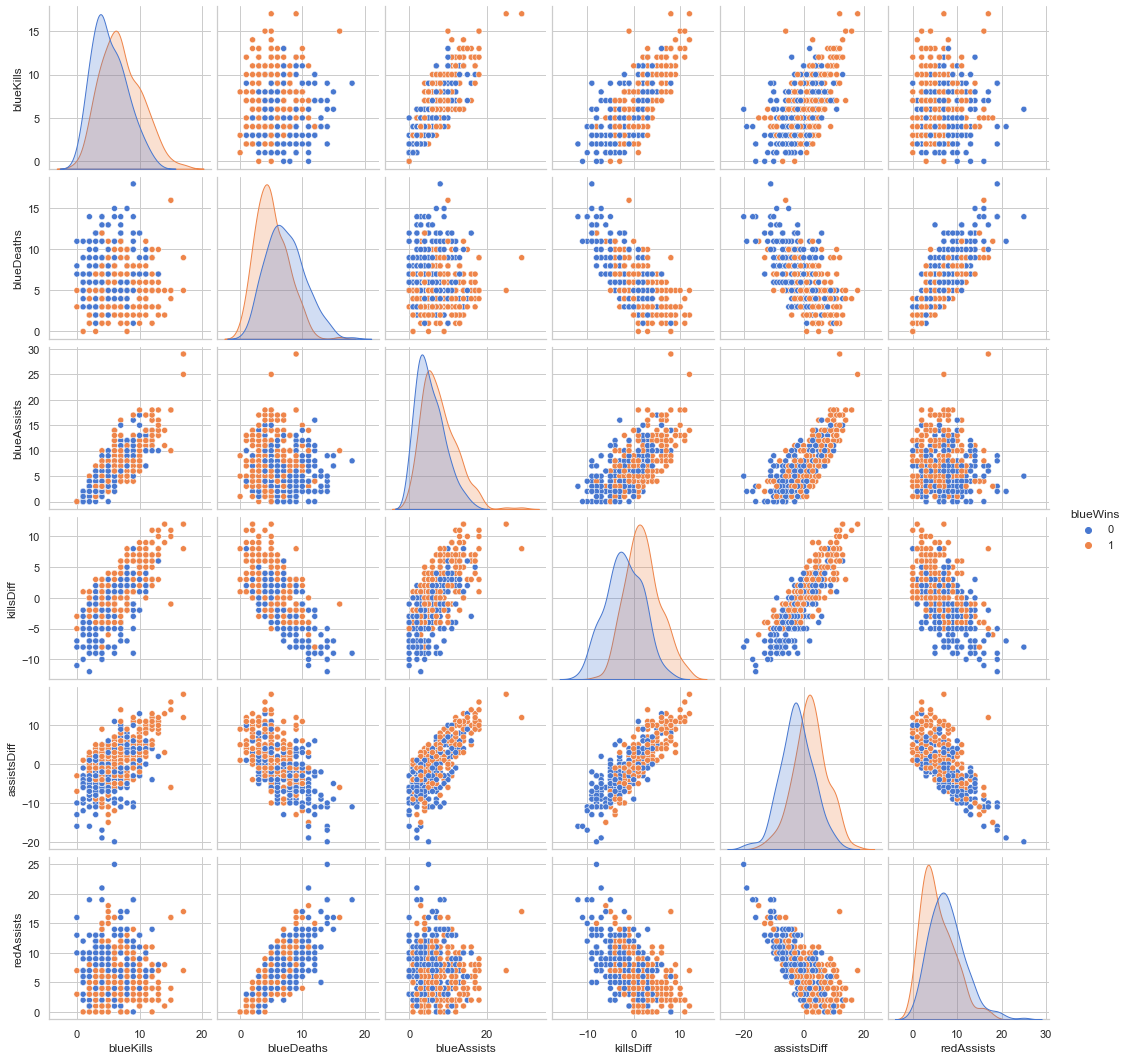

In [14]:
data = pd.concat([y, x], axis=1).sample(500)

sns.pairplot(data, vars=['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff', 'assistsDiff', 'redAssists'],
             hue='blueWins')
plt.show()

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


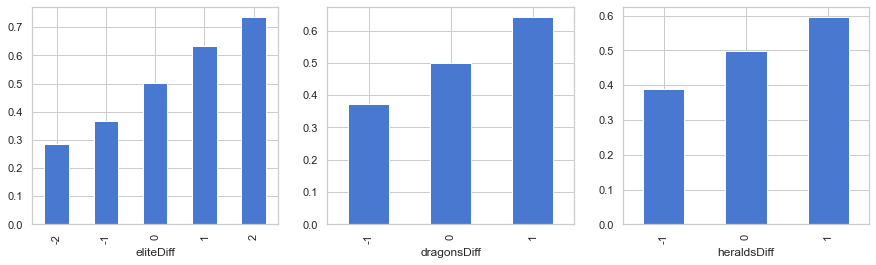

In [15]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']

data = pd.concat([y, x], axis=1)

eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])

print(eliteGroup)
print(dragonGroup)
print(heraldGroup)

plt.show()


towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

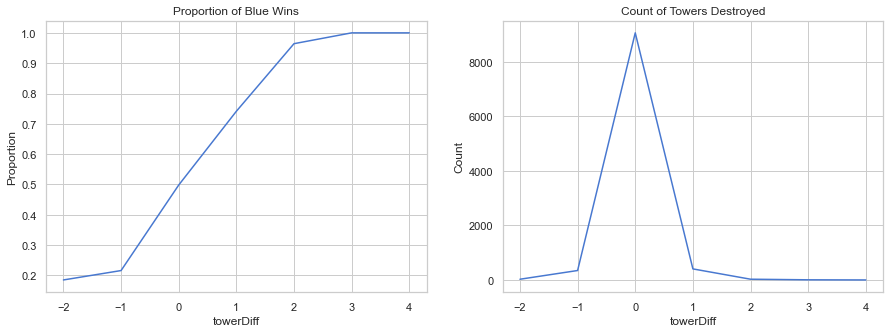

In [16]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']

data = pd.concat([y, x], axis=1)

towerGroup = data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')


# 模型训练和预测

In [17]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = y
data_features_part = x

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(
    data_features_part, data_target_part, test_size=0.2, random_state=2020)


In [19]:
## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型
clf = LGBMClassifier()
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

LGBMClassifier()

The accuracy of the Logistic Regression is: 0.8447425028470201
The accuracy of the Logistic Regression is: 0.722165991902834
The confusion matrix result:
 [[714 300]
 [249 713]]


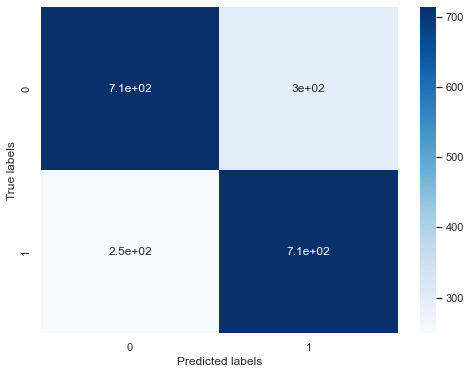

In [20]:
## 在训练集和测试集上分布利用训练好的模型进行预测
from sklearn import metrics
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_test, test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


<AxesSubplot:>

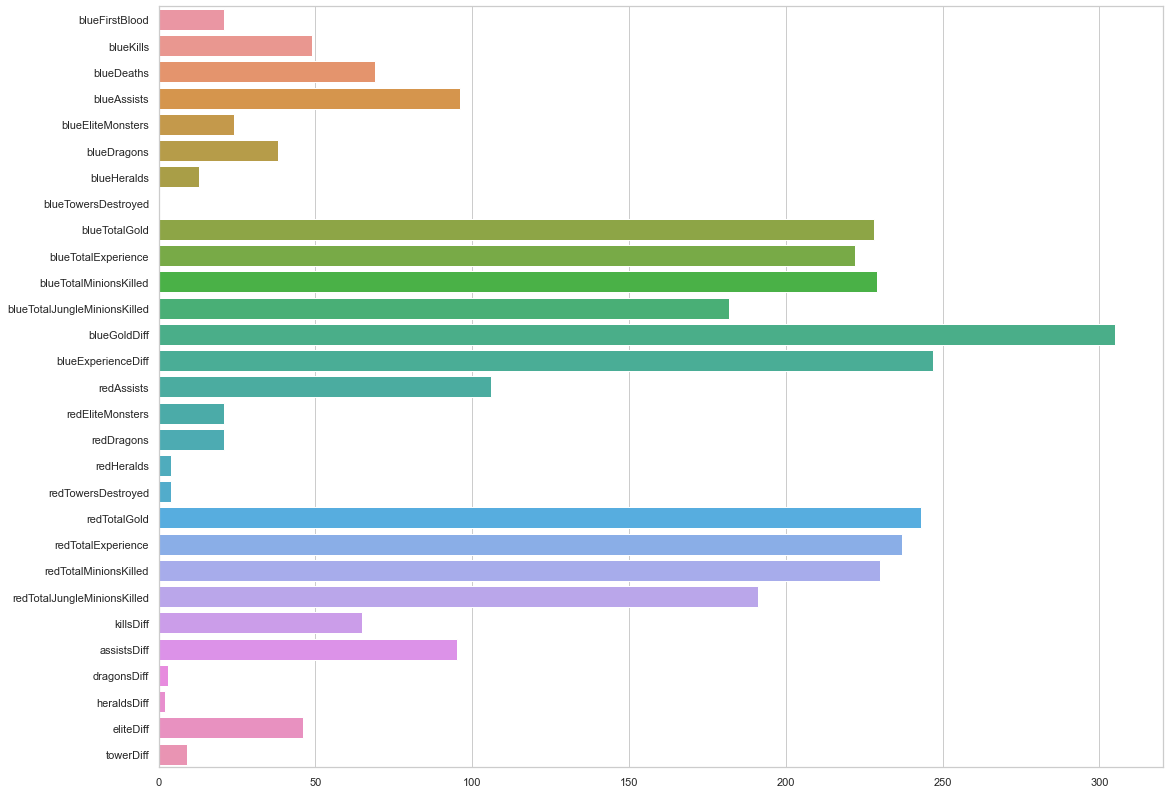

In [22]:
plt.figure(figsize=(18,14))
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)


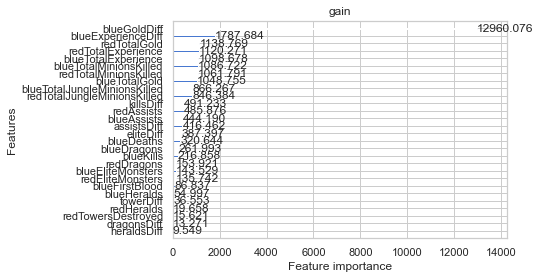

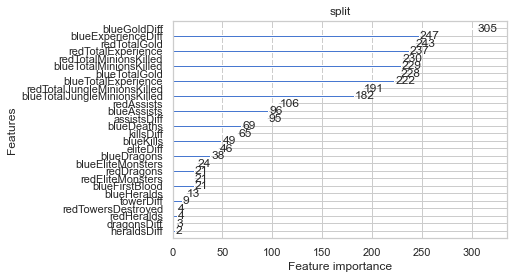

acc= 0.722165991902834


In [23]:
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance

def estimate(model,data):
    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="split")
    ax2.set_title('split')
    plt.show()
def classes(data,label,test):
    model=LGBMClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

In [31]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.25, 0.5, 0.1, 0.3, 0.6, 0.8, 1.2]
feature_fraction = [0.3, 0.5, 0.8, 1]
num_leaves = [1, 2, 4, 8, 16, 32]
max_depth = [-1, 1, 3, 5, 8, 16]

parameters = {'learning_rate': learning_rate,
              'feature_fraction': feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
model = LGBMClassifier(n_estimators=50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3,
                   scoring='accuracy', verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)


Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=-1

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=-1, num_leaves=32;, score=0.714 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=1, num_leaves=16;, score=0.719 total time=   0.0s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=1, num_leaves=2;, score=0.731 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=1, num_leaves=4;, score=0.719 total time=   0.0s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=1, num_leaves=8;, score=0.731 total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=1, num_leaves=4;, score=0.737 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytre

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=5, num_leaves=8;, score=0.725 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=3, num_leaves=8;, score=0.732 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=5, num_leaves=4;, score=0.721 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, lea

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=8, num_leaves=32;, score=0.720 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=5, num_leaves=8;, score=0.716 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.25, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=-1, num_leaves=8;, score=0.703 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.5, max

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=1, num_leaves=8;, score=0.720 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=32;, score=0.717 total time=   0.0s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=16;, score=0.717 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=5, num_leaves=4;, score=0.713 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.5, max_depth

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=3, num_leaves=8;, score=0.717 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=5, num_leaves=32;, score=0.697 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=5, num_leaves=16;, score=0.705 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=16, num_leaves=2;, score=0.720 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.5, max_depth=8, num_leaves=8;, score=0.722 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=1, num_leaves=32;, score=0.729 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=3, num_leaves=2;, score=0.729 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=3, num_leaves=4;, score=0.738 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=5, num_leaves=2;, score=0.720 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=3, num_leaves=16;, score=0.720 total time=   0.0s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.1, max_dep

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=3, num_leaves=8;, score=0.740 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=5, num_leaves=32;, score=0.727 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=3, num_leaves=32;, score=0.720 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, c

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 3/3] END feature_fraction=0.3, learning_rate=0.1, max_depth=16, num_leaves=16;, score=0.736 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=1, num_leaves=2;, score=0.718 total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=-1, num_leaves=2;, score=0.734 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=-1, num_leaves=16;, score=0.703 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=4;, score=0.732 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=2;, score=0.738 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=2;, score=0.718 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=16;, score=0.719 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=5, num_leaves=4;, score=0.715 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=5, num_leaves=2;, score=0.738 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=16;, score=0.730 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=3, num_leaves=32;, score=0.730 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=8, num_leaves=2;, score=0.738 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_b

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=-1, num_leaves=16;, score=0.680 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.3, max_depth=16, num_leaves=16;, score=0.704 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=-1, num_leaves=2;, score=0.738 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=-1, num_leaves=32;, score=0.696 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 2/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=1, num_leaves=16;, score=0.724 total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=3, num_leaves=4;, score=0.728 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=3, num_leaves=16;, score=0.711 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=3, num_leaves=32;, score=0.708 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=3, num_leaves=2;, score=0.738 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=8, num_leaves=16;, score=0.689 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=5, num_leaves=8;, score=0.692 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=16, num_leaves=2;, score=0.715 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=16, num_leaves=4;, score=0.706 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=16, num_leaves=8;, score=0.690 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=16, num_leaves=16;, score=0.680 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.6, max_depth=16, num_leaves=32;, score=0.696 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=1, num_leaves=2;, score=0.718 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=-1, num_leaves=16;, score=0.677 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsam

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=3, num_leaves=16;, score=0.698 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=5, num_leaves=2;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=1, num_leaves=8;, score=0.718 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=1, num_leaves=16;, score=0.718 total time=   0.1s
[CV 2/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=1, num_leaves=32;, score=0.729 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0.8, max_de

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=8, num_leaves=2;, score=0.736 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=5, num_leaves=32;, score=0.683 total time=   0.1s
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=16, num_leaves=2;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=0.8, max_depth=8, num_leaves=8;, score=0.685 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=0

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 3/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=-1, num_leaves=4;, score=0.682 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=1, num_leaves=4;, score=0.714 total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=-1, num_leaves=2;, score=0.737 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 1/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=1, num_leaves=2;, score=0.714 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=8, num_leaves=2;, score=0.714 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=5, num_leaves=16;, score=0.652 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=5, num_leaves=4;, score=0.682 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[CV 2/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=3, num_leaves=4;, score=0.703 total time=   0.1s
[CV 3/3] END feature_fraction=0.3, learning_rate=1.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=-1, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=-1, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=-1, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=16, num_leaves=8;, score=0.683 total time=   0.0s
[CV 1/3] END feature_fraction=0.3, learning_rate=1.2, max_depth=16, num_leaves=8;, score=0.663 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.3, learning_rate=1.2, max_dep

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=1, num_leaves=8;, score=0.736 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=1, num_leaves=4;, score=0.736 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.2

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=5, num_leaves=4;, score=0.730 total time=   0.0s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=5, num_leaves=16;, score=0.720 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=3, num_leaves=32;, score=0.734 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=5, num_leaves=2;, score=0.732 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_ra

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.5, learning_rate=0.25, max_depth=16, num_leaves=16;, score=0.720 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=-1, num_leaves=16;, score=0.697 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=1, num_leaves=4;, score=0.729 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=1, num_leaves=2;, score=0.729 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=1, num_leaves=8;, score=0.736 total time=   0.1s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.5, max_

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=3, num_leaves=8;, score=0.714 total time=   0.1s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=5, num_leaves=16;, score=0.707 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=5, num_leaves=2;, score=0.720 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=5, num_leaves=4;, score=0.728 total time=   0.0s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=8, num_leaves=8;, score=0.696 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=16, num_leaves=4;, score=0.710 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=16, num_leaves=2;, score=0.729 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=8, num_leaves=4;, score=0.728 total time=   0.0s
[CV 2/3] END feature_fraction=0.5, learning_rate=0

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.5, max_depth=16, num_leaves=16;, score=0.696 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=-1, num_leaves=4;, score=0.722 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=1, num_leaves=8;, score=0.730 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=-1, num_leaves=8;, score=0.737 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=-1, num_leaves=32;, score=0.718 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=8, num_leaves=1;, score=nan total time=   0.0s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=5, num_leaves=2;, score=0.720 total time=   0.0s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=3, num_leaves=8;, score=0.720 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=8, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=3

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=16, num_leaves=8;, score=0.727 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=8, num_leaves=8;, score=0.727 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=8, num_leaves=32;, score=0.719 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=16, num_leaves=4;, score=0.722 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=5, num_leaves=32;, score=0.725 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=16, num_leaves=16;, score=0.724 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.1, max_depth=16, num_leaves=32;, score=0.718 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=-1, num_leaves=16;, score=0.712 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=-1, num_leaves=2;, score=0.731 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_r

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=8, num_leaves=16;, score=0.709 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=16, num_leaves=2;, score=0.716 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=8, num_leaves=4;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=5, num_leaves=32;, score=0.709 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5,

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=16, num_leaves=8;, score=0.726 total time=   0.0s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.3, max_depth=8, num_leaves=32;, score=0.699 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=-1, num_leaves=2;, score=0.726 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=-1, num_leaves=4;, score=0.725 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=-1, num_leaves=16;, score=0.678 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=1, num_leaves=2;, score=0.720 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=1, n

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=3, num_leaves=4;, score=0.725 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=-1, num_leaves=32;, score=0.684 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=1, num_leaves=32;, score=0.726 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=3, num_leaves=2;, score=0.726 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=5, num_leaves=8;, score=0.703 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=3, num_leaves=32;, score=0.704 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6, max_depth=8, num_leaves=4;, score=0.713 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.6

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=1, num_leaves=16;, score=0.732 total time=   0.1s
[CV 2/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=-1, num_leaves=4;, score=0.709 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=-1, num_leaves=16;, score=0.682 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=1, num_leaves=8;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=5, num_leaves=4;, score=0.709 total time=   0.1s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=3, num_leaves=8;, score=0.702 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=3, num_leaves=4;, score=0.709 total time=   0.0s
[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=5, num_leaves=8;, score=0.698 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=5, num_leaves=2;, score=0.732 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_byt

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=-1, num_leaves=2;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=8, num_leaves=32;, score=0.679 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.8, max_depth=16, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, co

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=3, num_leaves=2;, score=0.718 total time=   0.0s
[CV 3/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=1, num_leaves=2;, score=0.729 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=-1, num_leaves=16;, score=0.664 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=1, num_leaves=16;, score=0.718 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=5, num_leaves=2;, score=0.729 total time=   0.1s
[CV 3/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=3, num_leaves=16;, score=0.682 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=3, num_leaves=4;, score=0.698 total time=   0.1s
[CV 1/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=8, num_leaves=2;, score=0.718 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=8, num_leaves=2;, score=0.726 total time=   0.1s[CV 2/3] END feature_fraction=0.5, learning_rate=1.2, max_depth

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 2/3] END feature_fraction=0.5, learning_rate=1.2, max_depth=16, num_leaves=32;, score=0.667 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=-1, num_leaves=4;, score=0.720 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=1, num_leaves=2;, score=0.737 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 w

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 2/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=3, num_leaves=8;, score=0.725 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=8, num_leaves=2;, score=0.737 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=5, num_leaves=8;, score=0.731 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=5, num_leaves=32;, score=0.707 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=16, num_leaves=16;, score=0.722 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=1, num_leaves=2;, score=0.719 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.25, max_depth=16, num_leaves=8;, score=0.718 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=-1, num_leaves=2;, score=0.732 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=-1, num_leaves=4;, score=0.727 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsam

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=3, num_leaves=16;, score=0.706 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=1, num_leaves=32;, score=0.733 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=3, num_leaves=8;, score=0.706 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, co

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=8, num_leaves=2;, score=0.732 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=8, num_leaves=8;, score=0.699 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=5, num_leaves=8;, score=0.708 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.5, max_depth=8, num_leaves=16;, score=0.691 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=5, num_leaves=2;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=3, num_leaves=32;, score=0.733 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=3, num_leaves=16;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=3, num_leaves=4;, score=0.743 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=8, num_leaves=32;, score=0.721 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=3, num_leaves=8;, score=0.737 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=8, num_leaves=4;, score=0.723 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=16, num_leaves=2;, score=0.730 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=5, num_leaves=16;, score=0.723 total time=   0.1s[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8

[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_de

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=-1, num_leaves=8;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=1, num_leaves=2;, score=0.729 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=-1, num_leaves=32;, score=0.697 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=-1, num_leaves=4;, score=0.730 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.1, max_depth=16, num_leaves=8;, score=0.720 total time=   0.1s
[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=3, num_leaves=4;, score=0.730 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=3, num_leaves=32;, score=0.732 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=3, num_leaves=8;, score=0.732 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.3, max_depth=1,

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=1, num_leaves=8;, score=0.734 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[CV 2/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=-1, num_leaves=16;, score=0.691 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 3/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=3, num_leaves=8;, score=0.717 total time=   0.1s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=8, num_leaves=16;, score=0.679 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=3, num_leaves=32;, score=0.696 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=5, num_leaves=16;, score=0.691 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=5, num_leaves=32;, score=0.688 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=8, num_leaves=2;, score=0.734 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=16, num_leaves=8;, score=0.695 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=1, num_leaves=4;, score=0.719 total time=   0.0s
[CV 1/3] END feature_fraction=0.8, learning_rate=0.6, max_depth=16, num_leaves=32;, score=0.676 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=1, num_leaves=2;, score=0.728 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8,

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=3, num_leaves=4;, score=0.711 total time=   0.0s
[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=5, num_leaves=2;, score=0.728 total time=   0.0s
[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=5, num_leaves=8;, score=0.692 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=3, num_leaves=8;, score=0.691 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=0.8

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=8, num_leaves=4;, score=0.711 total time=   0.0s
[CV 2/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=16, num_leaves=4;, score=0.711 total time=   0.1s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=16, num_leaves=2;, score=0.730 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=8, num_leaves=8;, score=0.692 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 3/3] END feature_fraction=0.8, learning_rate=0.8, max_depth=5, num_leaves=32;, score=0.667 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=-1, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 w

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=1, num_leaves=32;, score=0.710 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 1/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=1, num_leaves=16;, score=0.710 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=-1, num_leaves=8;, score=0.680 total time=   0.0s
[CV 3/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=1, num_leaves=4;, score=0.727 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV 2/3] END feature_fraction=0.8, learning_rate=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=-1, num_leaves=32;, score=0.713 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.25, max_depth=-1, num_leaves=4;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=8, num_leaves=32;, score=0.643 total time=   0.1s
[CV 1/3] END feature_fraction=1, learning_rate=0.25, max_depth=-1, num_leaves=8;, score=0.715 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=0.8, learning_rate=1.2, max_depth=16, num_leaves=32;, score=0.652 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=1, learning_rate=0.25, max_depth=3, num_leaves=4;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.25, max_depth=3, num_leaves=8;, score=0.710 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=5, num_leaves=8;, score=0.723 total time=   0.1s
[CV 1/3] END feature_fraction=1, learning_rate=0.25, max_depth=-1, num_leaves=32;, score=0.700 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=5, num_leaves=2;, score=0.731 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be i

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=8, num_leaves=4;, score=0.729 total time=   0.0s
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=16, num_leaves=8;, score=0.725 total time=   0.1s
[CV 3/3] END feature_fraction=1, learning_rate=0.25, max_depth=16, num_leaves=16;, score=0.717 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=16, num_leaves=2;, score=0.731 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=5, num_leaves=32;, score=0.710 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will b

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 3/3] END feature_fraction=1, learning_rate=0.5, max_depth=1, num_leaves=2;, score=0.733 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.25, max_depth=16, num_leaves=16;, score=0.709 total time=   0.1s
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=-1, num_leaves=8;, score=0.709 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=-1, num_leaves=4;, score=0.724 total time=   0.0s
[CV 3/3] END feature_fraction=1, learning_rate=0.5, max_depth=1, num_leaves=8;, score=0.733 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.5, max_depth=1, num_leaves=4;, 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.5, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=5, num_leaves=4;, score=0.724 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=3, num_le

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=3, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=1, num_leaves=16;, score=0.741 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.5, max_depth=16, num_leaves=32;, score=0.690 total time=   0.1s
[CV 2/3] END feature_fraction=1, learning_rate=0.1, max_depth=3, n

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 2/3] END feature_fraction=1, learning_rate=0.1, max_depth=8, num_leaves=2;, score=0.731 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.1, max_depth=8, num_leaves=2;, score=0.720 total time=   0.1s
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=5, num_leaves=8;, score=0.738 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=5, num_leaves=4;, score=0.741 total time=   0.1s
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=3, num_leaves=16;, score=0.739 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=16, num_leaves=4;, score=0.741 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.3, max_depth=-1, num_leaves=2;, score=0.730 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.3, max_depth=-1, num_leaves=2;, score=0.720 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 3/3] END feature_fraction=1, learning_rate=0.3, max_depth=1, num_leaves=16;, score=0.736 total time=   0.1s
[CV 3/3] END feature_fraction=1, learning_rate=0.1, max_depth=16, num_leaves=32;, score=0.724 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.3, max_depth=1, num_leaves=16;, score=0.720 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.3, max_depth=5, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 1/3] END feature_fraction=1, learning_rate=0.6, max_depth=1, num_leaves=16;, score=0.721 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.6, max_depth=1, num_leaves=16;, score=0.738 total time=   0.1s
[CV 3/3] END feature_fraction=1, learning_rate=0.6, max_depth=1, num_leaves=4;, score=0.738 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.6, max_depth=5, num_leaves=4;, score=0.722 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.6, max_depth=5, num_leaves=16;, score=0.684 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.6, max_depth=8, num_leaves=4;, score=0.722 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.6, max_depth=8, n

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=1, learning_rate=0.6, max_depth=16, num_leaves=32;, score=0.663 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.8, max_depth=1, num_leaves=1;, score=nan total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 3/3] END feature_fraction=1, learning_rate=0.8, max_depth=-1, num_leaves=4;, score=0.713 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.8, max_depth=-1, 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[CV 3/3] END feature_fraction=1, learning_rate=0.8, max_depth=3, num_leaves=4;, score=0.713 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.8, max_depth=1, num_leaves=32;, score=0.729 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.8, max_depth=1, num_leaves=16;, score=0.729 total time=   0.0s
[CV 3/3] END feature_fraction=1, learning_rate=0.8, max_depth=3, num_leaves=2;, score=0.734 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.8, max_depth=3, num_leave

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.8, max_depth=5, num_leaves=32;, score=0.666 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=0.8, max_depth=16, num_leaves=2;, score=0.729 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.8, max_depth=8, num_leaves=4;, score=0.706 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .



[CV 1/3] END feature_fraction=1, learning_rate=1.2, max_depth=-1, num_leaves=4;, score=0.683 total time=   0.0s
[CV 1/3] END feature_fraction=1, learning_rate=1.2, max_depth=1, num_leaves=2;, score=0.709 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=0.8, max_depth=16, num_leaves=8;, score=0.682 total time=   0.1s
[CV 2/3] END feature_fraction=1, learning_rate=0.8, max_depth=16, num_leaves=16;, score=0.679 total time=   0.1s[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1

[CV 1/3] END feature_fraction=1, learning_rate=1.2, max_depth=-1, num_leaves=8;, score=0.654 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ign

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.c

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=1.2, max_depth=3, num_leaves=4;, score=0.683 total time=   0.1s
[CV 2/3] END feature_fraction=1, learning_rate=1.2, max_depth=3, num_leaves=32;, score=0.681 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 1/3] END feature_fraction=1, learning_rate=1.2, max_depth=5, num_leaves=2;, score=0.709 total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[CV 2/3] END feature_fraction=1, learning_rate=1.2, max_depth=3, num_leaves=16;, score=0.681 total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will 

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /tmp/pip-req-build-u3yb2eqd/compile/src/io/config_auto.cpp, line 324 .

/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
504 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users

In [32]:
clf.best_params_


{'feature_fraction': 0.8,
 'learning_rate': 0.1,
 'max_depth': -1,
 'num_leaves': 4}

In [33]:
clf = LGBMClassifier(feature_fraction=0.8,
                     learning_rate=0.1, max_depth=-1, num_leaves=4)
clf.fit(x_train, y_train)
